# Conduct our analysis -- notebook 2

This notebook carry out the remaining analysis notebook.

Author: Xuyuan Zhang; Date: Feb. 16. 2024

In [2]:
import arcpy
from arcpy.sa import *
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
os.chdir(r'E:\umich\final project\data')

In [4]:
input_raster = arcpy.Raster('mosaic_clipped.tif')

## note

We can see from the raster file that there is a clear distinction between the left hand side and the right hand side of the picture. This is because the left and right time is not consistent. This would cause the estimation of the left hand result to be harder than the right figure.

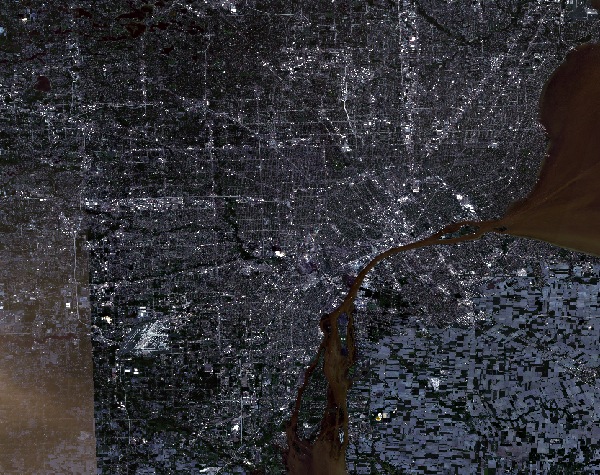

In [5]:
input_raster 

In [6]:
arcpy.env.workspace = r"E:\umich\final project\data"
input_raster_file = "mosaic_clipped.tif"  # Your 4-band input TIFF file
# Set the number of classes for the classification
num_classes = 8

# Set the minimum number of cells in each class (optional)
minimum_class_size = 2

# Set the sampling interval (optional)
sample_interval = 10

# Define the output signature file path (optional)
output_signature_file = "classification_signatures.gsg"

# Perform the unsupervised classification
out_unsupervised_classification = IsoClusterUnsupervisedClassification(
    input_raster_file, 
    num_classes, 
    minimum_class_size, 
    sample_interval)

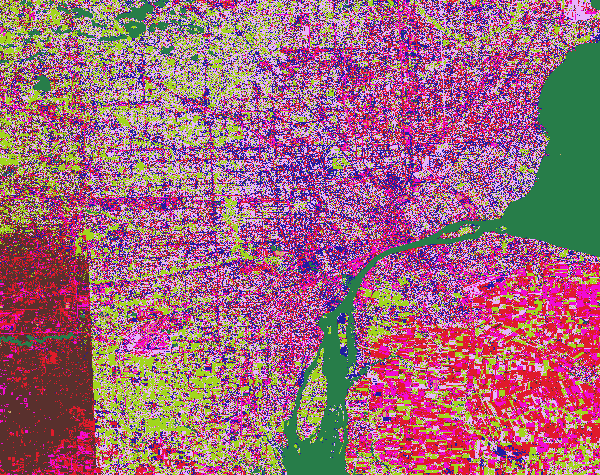

In [7]:
out_unsupervised_classification

In [9]:
classified_raster = "classified_raster.tif"
out_unsupervised_classification.save(classified_raster)
print("Classification completed successfully.")

Classification completed successfully.


In [14]:
result = arcpy.Raster(classified_raster)
class_2_only = Con(result == 2, result)

In [18]:
only_raster_2 = "urban-shape-detroit.tif"
class_2_only.save(only_raster_2)

## Finally, we can construct the sample study area

We can write a code of some sample study area to look at, so that we can take a picture as the cover.

In [19]:
shapefile_path = "../mask area/interesting area.shp"
interesting_zone = arcpy.sa.ExtractByMask(only_raster_2, shapefile_path)

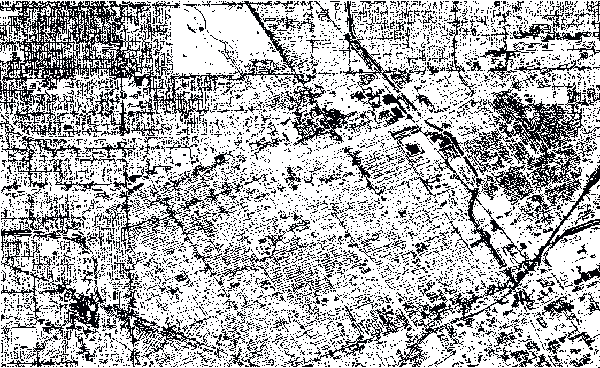

In [20]:
interesting_zone

In [21]:
interesting_zone_original = arcpy.sa.ExtractByMask(input_raster, shapefile_path)

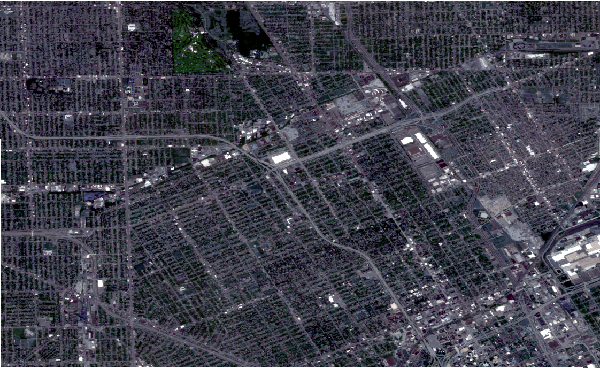

In [22]:
interesting_zone_original

## LIMITATION AND FUTURE WORK

1. Even thought our code only conduct research on detroit area in a given period, but it is also easy to collect the results and generalize to other areas.
2. The resolution of the sential 2 dataset is 10 meters which is too naive for further implementation. Therefore, we can think about using other higher resolution data to conduct the analysis or extracting urban footprint.
3. We just stop at the extracting urban area step, we can step forward to conduct more research on the urban land use coverage, green land cover rate or somthing.
4. We can also conduct mroe analysis using deep learning model, but this is only a half semester course, so I have limited time to do that.